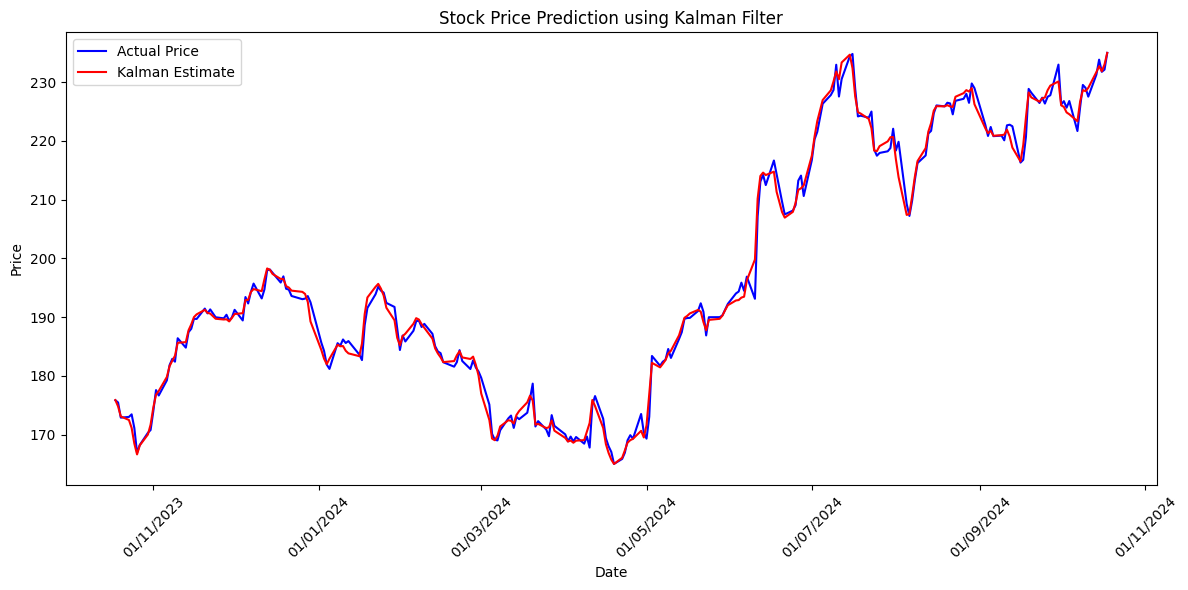

Initial Price: 235.0
Final Price: 175.84
Final Kalman Estimate: 175.86657156399207
Mean Absolute Error: 1.0036082340514463


In [16]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter


class KalmanFilter:
    def __init__(self, F, H, Q, R, P, x0):
        self.F = F  # State transition matrix
        self.H = H  # Observation matrix
        self.Q = Q  # Process noise covariance
        self.R = R  # Measurement noise covariance
        self.P = P  # Estimate error covariance
        self.x = x0  # Initial state estimate

    def predict(self):
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.H.shape[1])
        self.P = np.dot((I - np.dot(K, self.H)), self.P)
        return self.x


def generate_stock_data():
    df = pd.read_csv('../data/apple_stock.csv')
    dates = df['Date']
    # date to datetime
    dates = [datetime.strptime(date, "%m/%d/%Y") for date in dates]
    prices = df['Close']

    return pd.DataFrame({'Date': dates, 'Price': prices})


def apply_kalman_filter(df):
    # Define the matrices
    dt = 1.0  # time step
    F = np.array([[1, dt], [0, 1]])  # State transition matrix
    H = np.array([[1, 0]])  # Observation matrix
    Q = np.array([[0.1, 0], [0, 0.1]])  # Process noise covariance
    R = np.array([[1]])  # Measurement noise covariance
    P = np.eye(2)  # Initial estimate error covariance
    x0 = np.array([df['Price'].iloc[0], 0])  # Initial state estimate

    # Create the Kalman filter
    kf = KalmanFilter(F, H, Q, R, P, x0)

    # Run the filter
    estimates = []
    for price in df['Price']:
        kf.predict()
        x = kf.update(price)
        estimates.append(x[0])

    df['KalmanEstimate'] = estimates
    return df


def plot_results(df):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df['Date'], df['Price'], label='Actual Price', color='blue')
    ax.plot(df['Date'], df['KalmanEstimate'], label='Kalman Estimate', color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('Stock Price Prediction using Kalman Filter')
    ax.legend()
    ax.xaxis.set_major_formatter(DateFormatter("%d/%m/%Y"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Example usage
np.random.seed(42)  # for reproducibility
days = 100
initial_price = 100
volatility = 0.02

# Generate stock data
df = generate_stock_data()

# Apply Kalman filter
df = apply_kalman_filter(df)

# Plot results
plot_results(df)

# Print some statistics
print("Initial Price:", df['Price'].iloc[0])
print("Final Price:", df['Price'].iloc[-1])
print("Final Kalman Estimate:", df['KalmanEstimate'].iloc[-1])
print("Mean Absolute Error:", np.mean(np.abs(df['Price'] - df['KalmanEstimate'])))